In [3]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sn
from pprint import pprint
import numpy as np

from sklearn.datasets import fetch_20newsgroups
# use annual index instead?
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Chargement du dataset 20 newsgroups
Pour plus d'information : https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [4]:
news = fetch_20newsgroups(subset='all')

In [5]:
print("Number of articles: " + str(len(news.data)))

Number of articles: 18846


In [6]:
print("Number of categories: " + str(len(news.target_names)))

Number of categories: 20


# Exploration du dataset

In [7]:
labels = news.target_names
pprint(labels)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [8]:
# Exemples d'articles et de labels
for i, article in enumerate(news.data[:10]):
    print(f'===== {labels[news.target[i]]} =====')
    print(article.replace('\n', ' '), '\n')

===== rec.sport.hockey =====
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu> Subject: Pens fans reactions Organization: Post Office, Carnegie Mellon, Pittsburgh, PA Lines: 12 NNTP-Posting-Host: po4.andrew.cmu.edu    I am sure some bashers of Pens fans are pretty confused about the lack of any kind of posts about the recent Pens massacre of the Devils. Actually, I am  bit puzzled too and a bit relieved. However, I am going to put an end to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they are killing those Devils worse than I thought. Jagr just showed you why he is much better than his regular season stats. He is also a lot fo fun to watch in the playoffs. Bowman should let JAgr have a lot of fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final regular season game.          PENS RULE!!!   

===== comp.sys.ibm.pc.hardware =====
From: mblawson@midway.ecn.uok

# Création d'un modèle de machine learning avec Scikit-Learn
Pour plus d'information :
- Pipeline : https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- TfidfVectorizer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- MultinomialNB : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [9]:
classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))),
    ('classifier', MultinomialNB()),
    ])

# Séparation du dataset en features et target (X, y) et en train et test
Plus d'information : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
labelled_target = np.array([labels[t] for t in news.target])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(news.data, labelled_target, test_size=0.2, random_state=11)

# Entraînement du modèle de machine learning sur les données d'entrainement

In [12]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('classifier', MultinomialNB())])

# Prédiction des targets des données de test

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
# Aperçu des targets prédites
y_pred

array(['sci.crypt', 'comp.os.ms-windows.misc', 'sci.med', ...,
       'rec.sport.baseball', 'comp.windows.x', 'misc.forsale'],
      dtype='<U24')

In [15]:
# Aperçu des targets réelles
y_test

array(['sci.crypt', 'comp.os.ms-windows.misc', 'sci.med', ...,
       'rec.sport.baseball', 'comp.graphics', 'misc.forsale'],
      dtype='<U24')

# Construction du rapport de classification
Pour plus d'information sur la précision, le recall et le f1-score : https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel

In [16]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.83      0.87       172
           comp.graphics       0.90      0.85      0.87       184
 comp.os.ms-windows.misc       0.89      0.81      0.85       204
comp.sys.ibm.pc.hardware       0.75      0.83      0.79       195
   comp.sys.mac.hardware       0.94      0.88      0.91       195
          comp.windows.x       0.94      0.91      0.92       204
            misc.forsale       0.84      0.79      0.82       164
               rec.autos       0.88      0.93      0.90       180
         rec.motorcycles       0.92      0.98      0.95       173
      rec.sport.baseball       0.96      0.94      0.95       217
        rec.sport.hockey       0.87      0.98      0.92       178
               sci.crypt       0.84      0.99      0.91       197
         sci.electronics       0.93      0.87      0.90       199
                 sci.med       0.95      0.98      0.96       183
         

# Création d'une matrice de confusion

In [17]:
from scikitplot.metrics import plot_confusion_matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

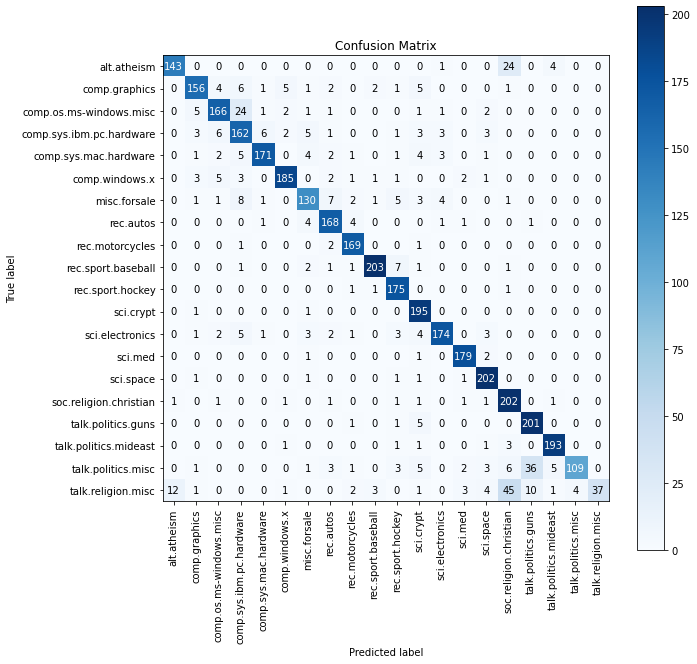

In [18]:
plot_confusion_matrix(y_test, y_pred, figsize=(10, 10), labels=labels, x_tick_rotation=90)